# Быковская Арина Александровна 
## БВТ2002

# ЛР3. NB, LR, SVM

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Создадим DataFrame train_df из CSV train.csv
train_df = pd.read_csv("./train.csv")

# Создадим DataFrame test_df из CSV test.csv
test_df = pd.read_csv("./test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Посчитайте количество объектов в DF train и test
print("Количество объектов в train_df:", train_df.shape[0])
print("Количество объектов в test_df:", test_df.shape[0])

Количество объектов в train_df: 891
Количество объектов в test_df: 418


<font color=red>  Примечание. В тестовых данных нет целевой переменной (т. е. столбец «Survival» отсутствует), поэтому цель состоит в том, чтобы предсказать эту переменную с использованием различных алгоритмов машинного обучения, таких как логистическая регрессия. </font>

In [4]:
# Проверьте, есть ли в данных train_df пропущенные значения
train_df.isnull().sum()
#Если все значения возвращенного Series равны 0, значит, пропущенных значений в DataFrame train_df нет.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Давайте разберемся с графиой "Age"
Ответьте на вопросы и сделайте следующие дейтсвия

Сколько процентов значений пропущено?
Найдите медиану и среднее значение переменной.
Постойте гистаграмму.
Какое значение больше: медиана или среднее?

In [5]:
print("Процент пропущенных значений в переменной Age: %.2f%%" % ((train_df['Age'].isnull().sum()/train_df.shape[0])*100))


Процент пропущенных значений в переменной Age: 19.87%


In [6]:
age_mean = train_df['Age'].mean()
age_median = train_df['Age'].median()
print("Среднее значение переменной Age: %.2f" % age_mean)
print("Медиана переменной Age: %.2f" % age_median)


Среднее значение переменной Age: 29.70
Медиана переменной Age: 28.00


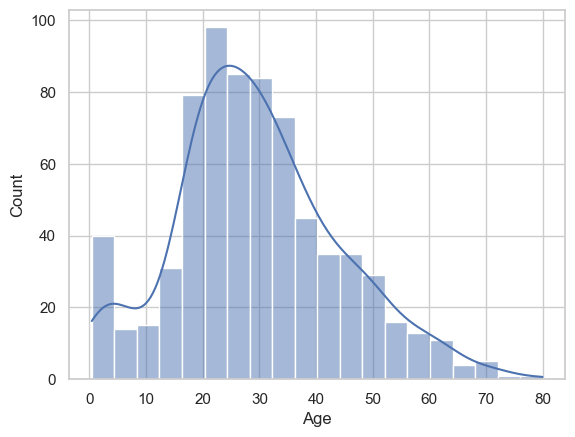

In [7]:
sns.histplot(data=train_df, x="Age", kde=True)
plt.show()


На основе результатов предыдущих вычислений можно сделать вывод, что среднее значение переменной "Age" больше, чем медиана. Это означает, что распределение значений переменной несимметрично и имеет длинный хвост вправо.

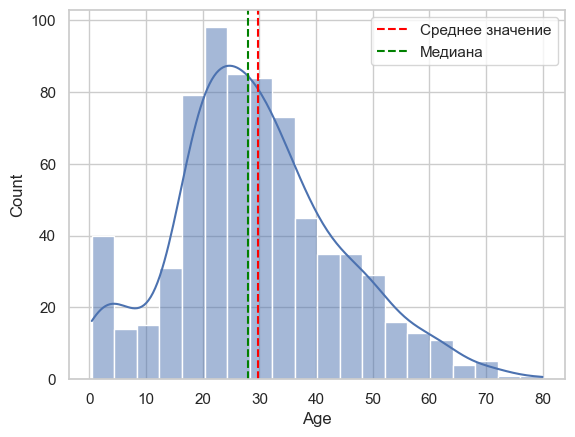

In [8]:
sns.histplot(data=train_df, x="Age", kde=True)
plt.axvline(x=age_mean, color='red', linestyle='--', label='Среднее значение')
plt.axvline(x=age_median, color='green', linestyle='--', label='Медиана')
plt.legend()
plt.show()


Исходя из результатов, среднее значение больше, чем медиана 

Так как график распределения смещён вправа, использование среднего значения может дать нам необъективные результаты из-за заполнения возрастов, которые старше желаемого. Чтобы справиться с этим, мы будем использовать медиану для вменения пропущенных значений.

Давайте разберемся с графиой "Cabin"

Сколько процентов значений пропущено?

In [9]:
print("Процент пропущенных значений в столбце 'Cabin': {:.2f}%".format(train_df['Cabin'].isna().mean() * 100))

Процент пропущенных значений в столбце 'Cabin': 77.10%


<font color=green>  Если в столбце больше половины пропусков, то он не информативен для нас. В дальнейшем мы его уберем </font>

Давайте разберемся с графиой "Embarked"

Сколько процентов значений пропущено?

In [10]:
print("Процент пропущенных значений в столбце 'Embarked': {:.2f}%".format(train_df['Embarked'].isna().mean() * 100))

Процент пропущенных значений в столбце 'Embarked': 0.22%


In [11]:
train_data = train_df.copy()

Основываясь на оценке отсутствующих значений в наборе данных, внесите в данные следующие изменения:

Если в строке отсутствует «Age», вставьте средний возраст.
Если отсутствует «Embarked», замените его на наиболее распространенный порт посадки.
Удалите столбец "Cabin"

In [12]:
# Заменяем отсутствующие значения столбца "Age" на средний возраст
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

# Заменяем отсутствующие значения столбца "Embarked" на наиболее распространенный порт посадки
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

# Удаляем столбец "Cabin"
train_df.drop('Cabin', axis=1, inplace=True)


Выполните проверку на пустые значения. Таковых остаться не должно

In [13]:
# проверка на пустые значения
print(train_df.isnull().sum())
print(test_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Согласно словарю данных Kaggle, и SibSp, и Parch относятся к путешествиям с семьей. Для простоты (и для учета возможной мультиколлинеарности) я объединим влияние этих переменных в один категориальный предиктор: путешествовал ли этот человек один или нет (0 или 1).
Не забудьте удалить SibSp и Parch (Пока работаем с train_data)

In [14]:
# Создаем новый столбец 'TravelAlone', присваивая ему значение 1, если SibSp и Parch равны 0, и 0 в противном случае
train_data['TravelAlone'] = (train_data['SibSp'] + train_data['Parch'] == 0).astype(int)

# Удаляем столбцы 'SibSp' и 'Parch'
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

также создадим категориальные переменные для класса пассажира ("Pclass"), пола ("Sex") и порта посадки ("Embarked").
Используем функцию pd.get_dummies
Не забудьте удалить колонки, из которых делаете dummie-переменные

In [15]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,NaN,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,C85,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,NaN,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,C123,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,NaN,1,False,False,True,False,False,True,True


Теперь примените те же изменения к тестовым данным.

Применим то же значение для «Возраст» в тестовых данных, что и для моих данных обучения (если отсутствует, возраст = 28).
Уберем «Cabin» из тестовых данных
В переменной порта "Embarked" не было пропущенных значений.
Добавим dummie переменные.
Наконец, заполним 1 пропущенное значение для «Fare» с медианой 14,45.

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


In [18]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

Оцените выживаемость Пассажиров до 16 лет

In [19]:
final_test["Survived"] = 0 # Создаем новый столбец "Survived" и заполняем его нулями
final_test.head() # Проверяем результат


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Survived
0,34.5,7.8292,1,False,False,True,False,True,False,True,0
1,47.0,7.0000,0,False,False,True,False,False,True,False,0
2,62.0,9.6875,1,False,True,False,False,True,False,True,0
3,27.0,8.6625,1,False,False,True,False,False,True,True,0
4,22.0,12.2875,0,False,False,True,False,False,True,False,0


In [20]:
# Выберем только тех пассажиров, у которых возраст <= 16 лет
under_16 = final_test[final_test["Age"] <= 16]

# Вычислим процент выживаемости
survival_rate = under_16["Survived"].mean() * 100

# Выведем результат
print(f"Процент выживаемости пассажиров до 16 лет: {survival_rate:.2f}%")


Процент выживаемости пассажиров до 16 лет: 0.00%


Учитывая выживаемость пассажиров моложе 16 лет,включим в свой набор данных еще одну категориальную переменную: «IsMinor». Значение 1 - если меньше 16 лет, 0 - если больше

In [21]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

Определите самый безопасный класс
Определите, кому удаолсь выжить с большей вероятностью: кто путешествовал в одиночку или нет

In [22]:
# Определение самого безопасного класса
safest_class = train_data.groupby('Pclass')['Survived'].sum().idxmax()
print('Самый безопасный класс:', safest_class)

# Определение того, кто выжил с большей вероятностью
survival_by_alone = train_data.groupby('TravelAlone')['Survived'].mean()
print('Процент выживаемости для тех, кто путешествовал в одиночку:', survival_by_alone[1])
print('Выживаемость для тех, кто не путешествовал в одиночку.:', survival_by_alone[0])


Самый безопасный класс: 1
Процент выживаемости для тех, кто путешествовал в одиночку: 0.30353817504655495
Выживаемость для тех, кто не путешествовал в одиночку.: 0.5056497175141242



##  Выбор признаков для анализа


### Рекурсивное устранение признаков

рекурсивное исключение функций (RFE) заключается в выборе функций путем рекурсивного рассмотрения все меньших и меньших наборов функций. Во-первых, оценщик обучается на начальном наборе признаков, и важность каждого признака определяется либо с помощью атрибута «coef_», либо с помощью атрибута «feature_importances_». Затем наименее важные функции удаляются из текущего набора функций. Эта процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество функций для выбора.

Изучите материалы ниже

 <br>
 https://www.helenkapatsa.ru/kross-validatsiia/ <br>
 https://www.codecamp.ru/blog/cross-validation-k-fold/ <br>
http://scikit-learn.org/stable/modules/feature_selection.html <br>

In [23]:
final_train

,Survived,Age,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,NaN,0,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,C85,0,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,NaN,1,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,C123,0,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,NaN,1,False,False,True,False,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,NaN,1,False,True,False,False,False,True,True,0
887,1,19.0,30.0000,B42,1,True,False,False,False,False,True,False,0
888,0,28.0,23.4500,NaN,0,False,False,True,False,False,True,False,0
889,1,26.0,30.0000,C148,1,True,False,False,True,False,False,True,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Создайте logreg и вычислите важность функций
model = LogisticRegression()
# создайте модель RFE и выберите 8 атрибутов
rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X, y)
# резюмируем  выбор атрибутов
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


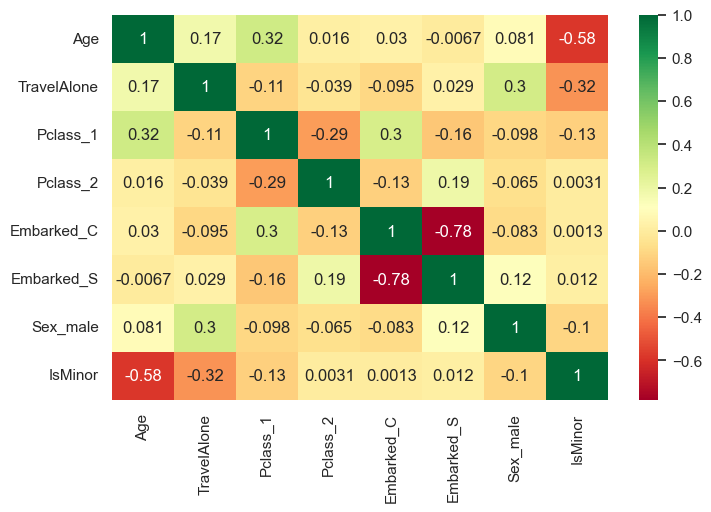

In [25]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## представьте, перед вами стоит задача оценки качества работы модели машинного обучения и сравнения таких моделей межд собой

идея: разделение датасета на выборку для обучения и тестирования

### Оценка модели на основе простого разделения train/test с использованием функции `train_test_split()`

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# можно использовать разделение обучения/тестирования с разными значениями random_state
# мы можем изменить значения random_state, которые изменят показатели точности
# результаты сильно меняются, поэтому результаты тестирования являются оценкой с высокой дисперсией
# test_size разделяет выборку на тестовую и убучающую в соотношении 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


### Оценка модели на основе K-fold cross-validation с использованием функции cross_val_score()

In [27]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Используем cross_val_score function
# Мы передаём полные X and y, а не X_train и y_train, функция сама разбивает данные
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} в качестве метрик оценивания результата (есть и другие)
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


### Оценка модели на основе K-fold cross-validation с использованием функции cross_validate()

In [28]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.024)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.850 (+/-0.028)



Формула Байеса


$$
P (A | B) = \frac{P ( B ∣ A ) P ( A )}{P ( B )}
$$


    где

        P ( A ) P(A) — априорная вероятность гипотезы A (смысл такой терминологии см. ниже);
        P ( A ∣ B ) — вероятность гипотезы A при наступлении события B (апостериорная вероятность);
        P ( B ∣ A )  — вероятность наступления события B при истинности гипотезы A;
        P ( B ) P(B) — полная вероятность наступления события B.



In [29]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [30]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

GaussianNB()

In [31]:

def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

    val_predictions = classifier.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))
    
cross_validate(classifier, (X_train, y_train), (X_test, y_test))

Model metrics
Accuracy  Train: 0.77, Validation: 0.76
Recall    Train: 0.66, Validation: 0.75
Precision Train: 0.78, Validation: 0.68


## SVM

In [33]:
from sklearn.svm import SVC
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

0.5698324022346368


|Посчитайте score, если train set будет состоять только из 3 переменных: ['Sex', 'Age', 'Pclass']

In [34]:
final_train

,Survived,Age,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,NaN,0,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,C85,0,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,NaN,1,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,C123,0,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,NaN,1,False,False,True,False,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,NaN,1,False,True,False,False,False,True,True,0
887,1,19.0,30.0000,B42,1,True,False,False,False,False,True,False,0
888,0,28.0,23.4500,NaN,0,False,False,True,False,False,True,False,0
889,1,26.0,30.0000,C148,1,True,False,False,True,False,False,True,0


In [35]:
Selected_features = ['Sex_male', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3']

x = final_train[Selected_features]
y= final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

classifier = SVC()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)


0.5698324022346368
